# Investigation of Effects of WDM on 2PCF in different regimes

In this notebook, we set out to check out the effects of WDM on three different regimes of the correlation function: the totally 1-halo part, the intermediate part, and the 2-halo part. We want to check if everything makes sense, and detect any features that may permit fitting the WDM mass.

In [1]:
%pylab inline
from halomod.wdm import HaloModelWDM
from copy import deepcopy

Populating the interactive namespace from numpy and matplotlib


/Users/Steven/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Setup

We basically use what we would consider to be the best components available currently: a mass function defined by Schneider+13 using the Sharp-$k$ formalism (updated to Schneider+14 parameters), NFW profile with Duffy et. a. CM relation (modified to WDM), and a bias model from Tinker+10.

Additionally, we improve the halo exclusion model compared to Schneider, using instead the Ng-Matched approach of Tinker+05. Finally, we use a very simple HOD parameterisation with 3 parameters, and this is just because we want to keep things simple on this side of things.

In [2]:
kwargs = dict(scale_dependent_bias="Tinker_SD05",takahashi=True,mf_fit="SMT",z=0,fsig_params={"a":1},
                filter="SharpK",filter_params={"c":2.5},cm_relation="DuffyWDM",hod_model="Zehavi05",
                hod_params={"alpha":1.214,"M_1":13.396,"M_min":12.0478},halo_exclusion="NgMatched_",
                _hc_spectrum="nonlinear",wdm_mass=0.1)

wdm = HaloModelWDM(**kwargs)

As our "CDM" model, we use a WDM model with very high particle mass. This should alleviate any small numerical differences just by using the transfer function.

In [20]:
cdm = deepcopy(wdm)
cdm.update(wdm_mass=10000.0)


## 2-halo Term

For the 2-halo term, let's use linear space, and set up our scales:

In [40]:
wdm.rlog=False
cdm.rlog=False
wdm.update(rmin=70.0,rmax=110.0,rnum=40.0)
cdm.update(rmin=70.0,rmax=110.0,rnum=40.0)


First, lets just make a raw plot, changing just $m_x$. 

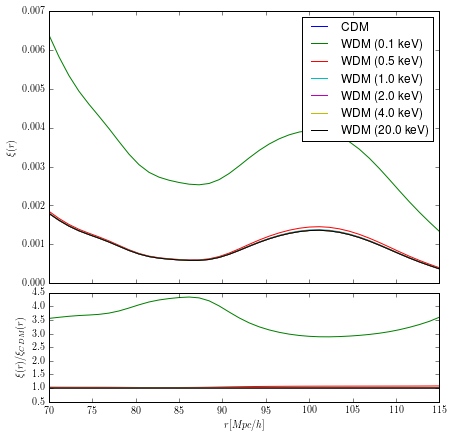

In [57]:
fig,ax = subplots(2,1,sharex=True
                  ,
                 gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

ax[0].plot(cdm.r,cdm.corr_gg,label="CDM")
ax[1].plot(cdm.r,np.ones_like(cdm.r))

for i,mx in enumerate([0.1,0.5,1.0,2.0,4.0,20.0]):
    wdm.update(wdm_mass=mx)
    ax[0].plot(wdm.r,wdm.corr_gg,label="WDM (%s keV)"%mx)
    ax[1].plot(wdm.r,wdm.corr_gg/cdm.corr_gg)

ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)

So, initially, we see two things that can change, the overall amplitude, and the shape. All of the WDM models seem to have some sort of scale-dependent shape change, while the overall "DC" bias is very much pronounced in the small WDM mass. 

First, let's explain the overall bias. 

Since these are large scales, where $u(k|m) \rightarrow 1$, we have $\xi_{gg}(r) = b_{eff}^2 \xi_{m}(r)$, where

$$ b_{eff} = \frac{1}{\bar{n}_g}\int_{m_{min}} n(m) b(m) N_t(m) dm. $$

and

$$ \bar{n}_g = \int_{m_{min}} n(m) N_t(m) dm. $$

It would seem that what is happening is that as $m_{hm}$ increases, so that $n(m)$ has higher cut-off, we are more highly weighting the higher masses in the integral, which have higher bias.

Let's normalise the above plot by this effective bias:

CDM Beff^2:  1.03358381271
0.1  kev Beff^2:  3.18394652209
0.5  kev Beff^2:  1.07123423859
1.0  kev Beff^2:  1.0402396061
2.0  kev Beff^2:  1.03476939422
4.0  kev Beff^2:  1.03379530468
20.0  kev Beff^2:  1.03358767933


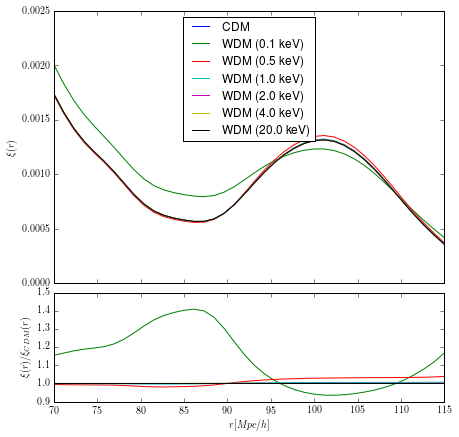

In [58]:
fig,ax = subplots(2,1,sharex=True,gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

ax[0].plot(cdm.r,cdm.corr_gg/cdm.bias_effective**2,label="CDM")
ax[1].plot(cdm.r,np.ones_like(cdm.r))
print "CDM Beff^2: ", cdm.bias_effective**2
for i,mx in enumerate([0.1,0.5,1.0,2.0,4.0,20.0]):
    wdm.update(wdm_mass=mx)
    ax[0].plot(wdm.r,wdm.corr_gg/wdm.bias_effective**2,label="WDM (%s keV)"%mx)
    ax[1].plot(wdm.r,wdm.corr_gg*cdm.bias_effective**2/cdm.corr_gg/wdm.bias_effective**2)
    print mx, " kev Beff^2: ", wdm.bias_effective**2
    
ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)

This takes most of the large-scale bias away, as we should expect. Unfortunately, this massive biasing won't be able to be separated from $m_{min}$ in any analysis:

CDM Beff^2:  1.03358381271
MMin= 9.0  Beff^2:  0.376026066063
MMin= 10.0  Beff^2:  0.415244587353
MMin= 11.0  Beff^2:  0.53107395632
MMin= 12.0  Beff^2:  0.990601711862
MMin= 13.0  Beff^2:  2.58408383045
MMin= 14.0  Beff^2:  6.34996416187


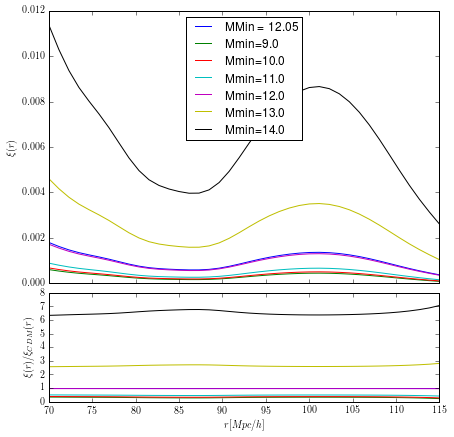

In [59]:
fig,ax = subplots(2,1,sharex=True,gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

wdm.update(wdm_mass=10000.0)

ax[0].plot(cdm.r,cdm.corr_gg,label="MMin = 12.05")
ax[1].plot(cdm.r,np.ones_like(cdm.r))

print "CDM Beff^2: ", cdm.bias_effective**2
for i,mmin in enumerate([9.0,10.0,11.0,12.0,13.0,14.0]):
    wdm.update(hod_params={"M_min":mmin})
    ax[0].plot(wdm.r,wdm.corr_gg,label="Mmin=%s"%mmin)
    ax[1].plot(wdm.r,wdm.corr_gg/cdm.corr_gg)
    print "MMin=",mmin, " Beff^2: ", wdm.bias_effective**2
    
ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)

We can clearly see that $m_{min}$ has much the same effect (modulo scale-dependent stuff). So what about that scale-dependent stuff? 

Well, let's first look at what happens just with $m_{min}$ in more detail, since it has much of the same effect, but is literally just a sharp-cutoff in the integrals.

CDM Beff^2:  1.03358381271
MMin= 9.0  Beff^2:  0.376026066063
MMin= 10.0  Beff^2:  0.415244587353
MMin= 11.0  Beff^2:  0.53107395632
MMin= 12.0  Beff^2:  0.990601711862
MMin= 13.0  Beff^2:  2.58408383045
MMin= 14.0  Beff^2:  6.34996416187


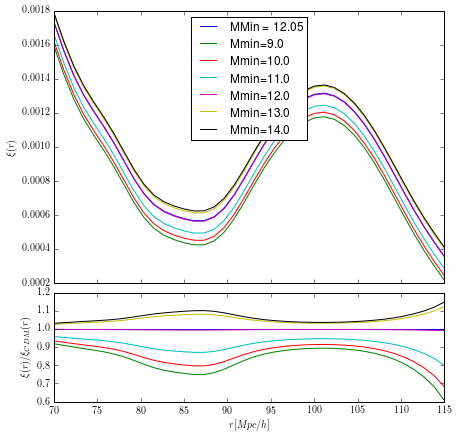

In [60]:
fig,ax = subplots(2,1,sharex=True,gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

wdm.update(wdm_mass=10000.0)

ax[0].plot(cdm.r,cdm.corr_gg/cdm.bias_effective**2,label="MMin = 12.05")
ax[1].plot(cdm.r,np.ones_like(cdm.r))

print "CDM Beff^2: ", cdm.bias_effective**2
for i,mmin in enumerate([9.0,10.0,11.0,12.0,13.0,14.0]):
    wdm.update(hod_params={"M_min":mmin})
    ax[0].plot(wdm.r,wdm.corr_gg/wdm.bias_effective**2,label="Mmin=%s"%mmin)
    ax[1].plot(wdm.r,wdm.corr_gg*cdm.bias_effective**2/cdm.corr_gg/wdm.bias_effective**2)
    print "MMin=",mmin, " Beff^2: ", wdm.bias_effective**2
    
ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)
wdm.update(hod_params={"M_min":12.0478})

Here again the overall bias is reduced (though not as much as in the WDM case!), but we are left with some scale-dependent residual.

Recall that the two-halo term is 

$$ P(k,r) = P_{\rm halofit}(k) \frac{1}{\bar{n}_g}\left[ \int_{m_{min}}^{m_{lim}} n(m) b(m,r) u(k|m) N_t(m) dm\right]^2. $$

We must expect that this residual bias is coming from one of $P_{\rm halofit}(k)$, $b(m,r)$ or $u(k|m)$. So let's try these. 

First, what if we use $P_{lin}(k)$?


CDM Beff^2:  1.03358381271
0.1  kev Beff^2:  3.18394652209
0.5  kev Beff^2:  1.07123423859
1.0  kev Beff^2:  1.0402396061
2.0  kev Beff^2:  1.03476939422
4.0  kev Beff^2:  1.03379530468
20.0  kev Beff^2:  1.03358767933


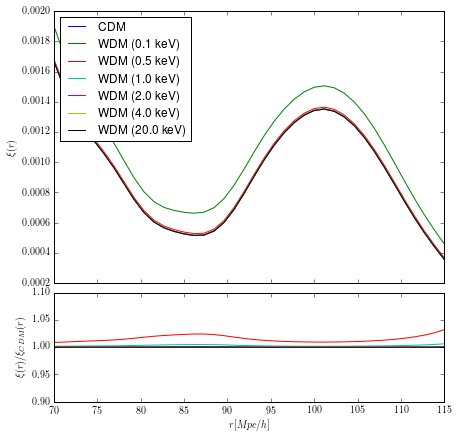

In [61]:
fig,ax = subplots(2,1,sharex=True,gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

wdm.update(_hc_spectrum="linear",hod_params={"M_min":12.0478})
cdm.update(_hc_spectrum="linear")

ax[0].plot(cdm.r,cdm.corr_gg/cdm.bias_effective**2,label="CDM")
ax[1].plot(cdm.r,np.ones_like(cdm.r))

print "CDM Beff^2: ", cdm.bias_effective**2
for i,mx in enumerate([0.1,0.5,1.0,2.0,4.0,20.0]):
    wdm.update(wdm_mass=mx)
    ax[0].plot(wdm.r,wdm.corr_gg/wdm.bias_effective**2,label="WDM (%s keV)"%mx)
    ax[1].plot(wdm.r,wdm.corr_gg*cdm.bias_effective**2/cdm.corr_gg/wdm.bias_effective**2)
    print mx, " kev Beff^2: ", wdm.bias_effective**2
    
ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)
ax[1].set_ylim((0.9,1.1))
wdm.update(_hc_spectrum="nonlinear")
cdm.update(_hc_spectrum="nonlinear")

This reduces most of the scale-dependent bias here. But why? The halofit $P(k)$ is the more correct one to use, but it may be giving spurious results? Maybe try using $m_{min}$, which shouldn't introduce any weirdness on its own:

CDM Beff^2:  1.03358381271
MMin= 9.0  Beff^2:  0.376026066063
MMin= 10.0  Beff^2:  0.415244587353
MMin= 11.0  Beff^2:  0.53107395632
MMin= 12.0  Beff^2:  0.990601711862
MMin= 13.0  Beff^2:  2.58408383045
MMin= 14.0  Beff^2:  6.34996416187


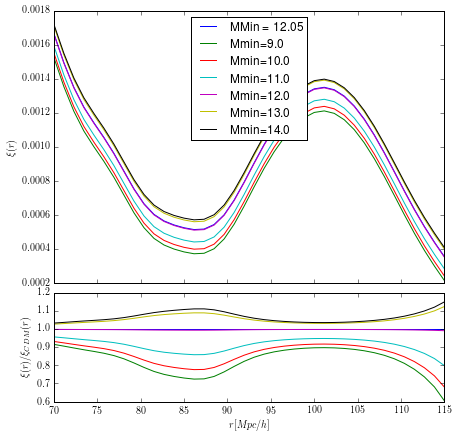

In [31]:
fig,ax = subplots(2,1,sharex=True,gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

wdm.update(_hc_spectrum="linear",hod_params={"M_min":12.0478},wdm_mass=10000.0)
cdm.update(_hc_spectrum="linear")

ax[0].plot(cdm.r,cdm.corr_gg/cdm.bias_effective**2,label="MMin = 12.05")
ax[1].plot(cdm.r,np.ones_like(cdm.r))

print "CDM Beff^2: ", cdm.bias_effective**2
for i,mmin in enumerate([9.0,10.0,11.0,12.0,13.0,14.0]):
    wdm.update(hod_params={"M_min":mmin})
    ax[0].plot(wdm.r,wdm.corr_gg/wdm.bias_effective**2,label="Mmin=%s"%mmin)
    ax[1].plot(wdm.r,wdm.corr_gg*cdm.bias_effective**2/cdm.corr_gg/wdm.bias_effective**2)
    print "MMin=",mmin, " Beff^2: ", wdm.bias_effective**2
    
ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)
wdm.update(hod_params={"M_min":12.0478})
wdm.update(_hc_spectrum="nonlinear")
cdm.update(_hc_spectrum="nonlinear")

Okay, so in this case, using linear or nonlinear really doesn't matter, the scale-dependence remains, so there is definitely a component that comes from increasing $m_{min}$, but also a component that comes from the interplay between the WDM transfer and nonlinear/linear power. This latter one could be physical, but may not be. 

The next thing we should check is $b(m,r)$, so we can try a non-scale-dependent bias:

CDM Beff^2:  1.03358381271
0.1  kev Beff^2:  3.18394652209
0.5  kev Beff^2:  1.07123423859
1.0  kev Beff^2:  1.0402396061
2.0  kev Beff^2:  1.03476939422
4.0  kev Beff^2:  1.03379530468
20.0  kev Beff^2:  1.03358767933


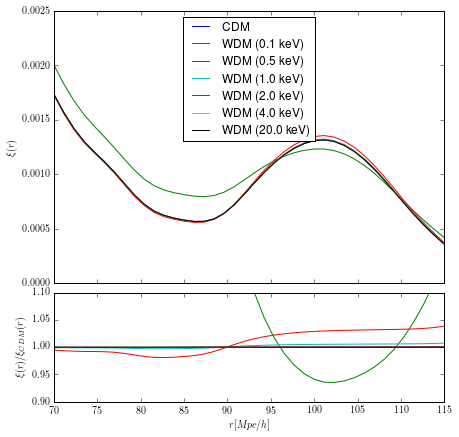

In [62]:
fig,ax = subplots(2,1,sharex=True,gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

wdm.update(scale_dependent_bias=None)
cdm.update(scale_dependent_bias=None)

ax[0].plot(cdm.r,cdm.corr_gg/cdm.bias_effective**2,label="CDM")
ax[1].plot(cdm.r,np.ones_like(cdm.r))

print "CDM Beff^2: ", cdm.bias_effective**2
for i,mx in enumerate([0.1,0.5,1.0,2.0,4.0,20.0]):
    wdm.update(wdm_mass=mx)
    ax[0].plot(wdm.r,wdm.corr_gg/wdm.bias_effective**2,label="WDM (%s keV)"%mx)
    ax[1].plot(wdm.r,wdm.corr_gg*cdm.bias_effective**2/cdm.corr_gg/wdm.bias_effective**2)
    print mx, " kev Beff^2: ", wdm.bias_effective**2
    
ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)
ax[1].set_ylim((0.9,1.1))
wdm.update(scale_dependent_bias="Tinker_SD05")
cdm.update(scale_dependent_bias="Tinker_SD05")

We see that not using the scale-dependent bias actually increases the scale-dependence, so we are all good with keeping it. 

Lastly, for $u(k|m)$, it may be better to look at the power spectrum on scales of ~100 Mpc/h. First, let's look at $u(k|m)$:


7.07565175247


<matplotlib.colorbar.Colorbar instance at 0x11898f908>

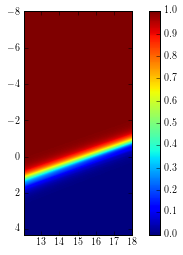

In [22]:
imshow(cdm.profile.u(cdm.k,cdm.M,norm="m"),
       extent=(log10(cdm.M[0].value),log10(cdm.M[-1].value),log10(cdm.k[-1].value),log10(cdm.k[0].value)))
colorbar()

6.47458151584


<matplotlib.colorbar.Colorbar instance at 0x105e42560>

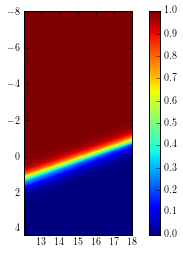

In [23]:
wdm.update(wdm_mass=1.0)
imshow(wdm.profile.u(wdm.k,wdm.M,norm="m"),
       extent=(log10(wdm.M[0].value),log10(wdm.M[-1].value),log10(wdm.k[-1].value),log10(wdm.k[0].value)))
colorbar()

----- Mx =  0.1
3.24080853127
7.07565175247
Max diff in U,  1.06581410364e-14 -0.791767836623
Max diff in c,  5.02699996918
----- Mx =  0.5
5.2779219663
7.07565175247
Max diff in U,  1.232292496e-05 -0.379453647279
Max diff in c,  2.09590033812
----- Mx =  1.0
6.47458151584
7.07565175247
Max diff in U,  1.57267457961e-05 -0.115710617734
Max diff in c,  0.601070236628
----- Mx =  2.0
6.99674510213
7.07565175247
Max diff in U,  1.76024293015e-05 -0.0154999799872
Max diff in c,  0.0789066503371
----- Mx =  4.0
7.06752714739
7.07565175247
Max diff in U,  1.25105516759e-05 -0.00160025311699
Max diff in c,  0.00812460507985
----- Mx =  20.0
7.07561338688
7.07565175247
Max diff in U,  1.57211740732e-05 -1.1931539121e-05
Max diff in c,  3.83655889076e-05


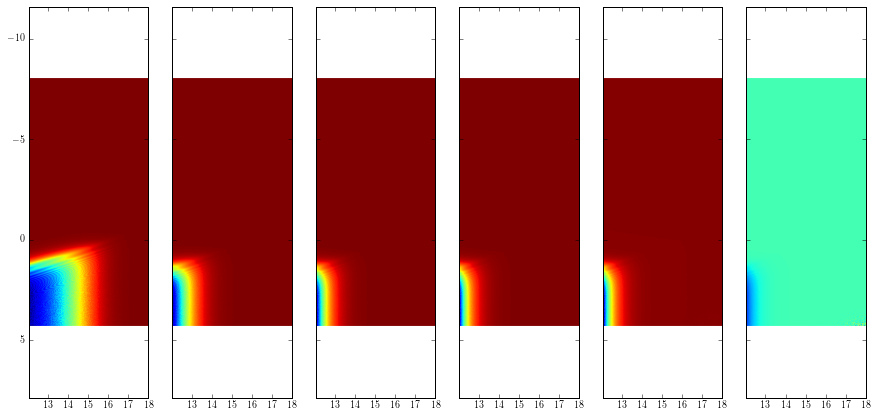

In [24]:
fig,ax=plt.subplots(1,6,sharex=True,sharey=True,figsize=(15,7))

for i,mx in enumerate([0.1,0.5,1.0,2.0,4.0,20.0]):
    wdm.update(wdm_mass=mx)
    print "----- Mx = ", mx
    rel_diff = wdm.profile.u(wdm.k,wdm.M,norm="m")/cdm.profile.u(cdm.k,cdm.M,norm="m")-1
    img = ax[i].imshow(rel_diff,
       extent=(log10(wdm.M[0].value),log10(wdm.M[-1].value),log10(wdm.k[-1].value),log10(wdm.k[0].value)))
    print "Max diff in U, ", np.max(rel_diff), np.min(rel_diff)
    print "Max diff in c, ", np.max(np.abs(wdm.concentration-cdm.concentration))

What we can see is that anything that is $\sim \leq 1$Mpc/$h$ is equivalently 1 over all masses, and doesn't change for basically any WDM mass. At small masses, slighltly larger $k$, $u$ does change for small WDM masses, due to the change in the concentration. But this shouldn't affect these large scales.

To make sure, we can plot the power spectrum:

7.07565175247
CDM Beff^2:  1.03358381271
3.24080853127
0.1  kev Beff^2:  3.18394652209
5.2779219663
0.5  kev Beff^2:  1.07123423859
6.47458151584
1.0  kev Beff^2:  1.0402396061
6.99674510213
2.0  kev Beff^2:  1.03476939422
7.06752714739
4.0  kev Beff^2:  1.03379530468
7.07561338688
20.0  kev Beff^2:  1.03358767933


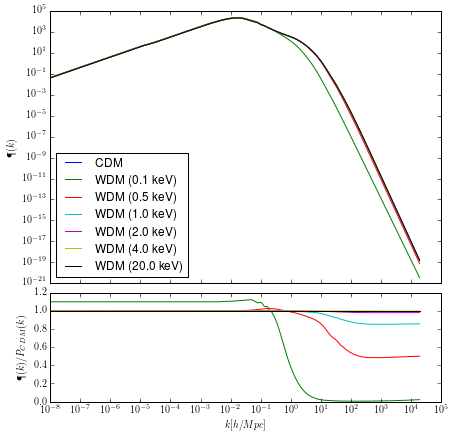

In [25]:
fig,ax = subplots(2,1,sharex=True,gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7),
                  subplot_kw={"xscale":'log'})

ax[0].plot(cdm.k,cdm.power_gg_2h[10]/cdm.bias_effective**2,label="CDM")
ax[1].plot(cdm.k,np.ones_like(cdm.k))

print "CDM Beff^2: ", cdm.bias_effective**2
for i,mx in enumerate([0.1,0.5,1.0,2.0,4.0,20.0]):
    wdm.update(wdm_mass=mx)
    ax[0].plot(wdm.k,wdm.power_gg_2h[10]/wdm.bias_effective**2,label="WDM (%s keV)"%mx)
    ax[1].plot(wdm.k,wdm.power_gg_2h[10]*cdm.bias_effective**2/cdm.power_gg_2h[10]/wdm.bias_effective**2)
    print mx, " kev Beff^2: ", wdm.bias_effective**2
    
ax[1].set_xlabel(r"$k [h/Mpc]$")
ax[0].set_ylabel(r"$\P(k)$")
ax[1].set_ylabel(r"$\P(k)/P_{CDM}(k)$")
ax[0].legend(loc=0)
ax[0].set_yscale('log')

Finally, the other thing we can check is just the pure dm nonlinear correlation.

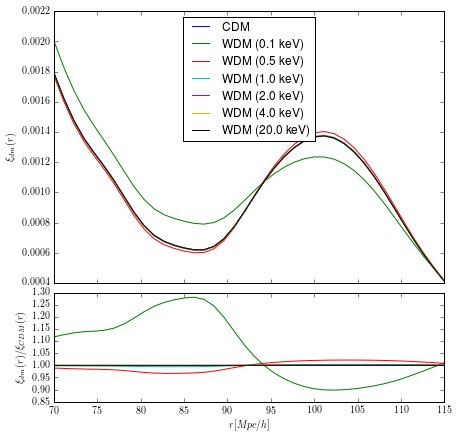

In [26]:
fig,ax = subplots(2,1,sharex=True,
                 gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

ax[0].plot(cdm.r,cdm.corr_mm_base,label="CDM")
ax[1].plot(cdm.r,np.ones_like(cdm.r))

for i,mx in enumerate([0.1,0.5,1.0,2.0,4.0,20.0]):
    wdm.update(wdm_mass=mx)
    ax[0].plot(wdm.r,wdm.corr_mm_base,label="WDM (%s keV)"%mx)
    ax[1].plot(wdm.r,wdm.corr_mm_base/cdm.corr_mm_base)

ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi_{dm}(r)$")
ax[1].set_ylabel(r"$\xi_{dm}(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)

We can see that most of the difference comes straight through here, which might be a little worrying, since we're not quite sure we trust HALOFIT in detail.

Now, we want to see how far we must go to get a normalised difference of say 10% at 2keV.



In [41]:
wdm.update(wdm_mass=2.0)

for mmin in np.arange(10.2,8.0,-0.1):
    cdm.update(hod_params={"M_min":mmin})
    wdm.update(hod_params={"M_min":mmin})
    
    w = wdm.corr_gg/np.mean(wdm.corr_gg)
    c = cdm.corr_gg/np.mean(cdm.corr_gg)
    maxx = np.max(np.abs(w/c-1))
    print mmin, maxx,
    if maxx>=0.1:
        print "wins the day."
        break
    print 


8.03351466094
10.4211644617
10.2 0.0206919589396
8.03351466094
10.6418283546
10.1 0.0253092113486
8.03351466094
10.8671647152
10.0 0.0307751763369
8.03351466094
11.0972724809
9.9 0.0372075737319
8.03351466094
11.3322526845
9.8 0.0447189648211
8.03351466094
11.5722084976
9.7 0.0534321391297
8.03351466094
11.817245277
9.6 0.0634307210019
8.03351466094
12.0674706098
9.5 0.0747891186808
8.03351466094
12.3229943617
9.4 0.0875378299519
8.03351466094
12.5839287245
9.3 0.101631918465 wins the day.


(-0.2, 0.2)

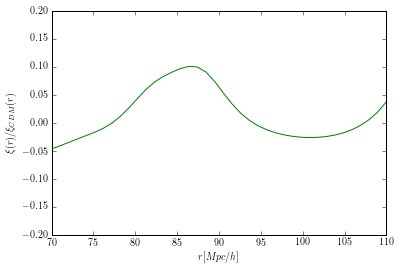

In [42]:
#fig,ax = subplots(2,1,sharex=True,gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

#ax[0].plot(cdm.r,cdm.corr_gg/cdm.bias_effective**2,label="CDM")
plot(cdm.r,np.ones_like(cdm.r))

#ax[0].plot(wdm.r,wdm.corr_gg/wdm.bias_effective**2,label="WDM (%s keV)"%mx)
plot(wdm.r,w/c-1)

    
xlabel(r"$r [Mpc/h]$")
ylabel(r"$\xi(r)$")
ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ylim((-0.2,0.2))
#legend(loc=0)



## Small-Scale

In [26]:
from halomod import ProjectedCF

class ProjectedCFWDM(ProjectedCF,HaloModelWDM):
    pass

wdm = ProjectedCFWDM(**kwargs)
cdm = deepcopy(wdm)
cdm.update(wdm_mass=10000.0)

wdm.rlog=True
cdm.rlog=True
wdm.update(rp_min=0.01,rp_max=2.,rp_num=40,rnum=80)
cdm.update(rp_min=0.01,rp_max=2.,rp_num=40,rnum=80)


#### Raw Plot changing mx

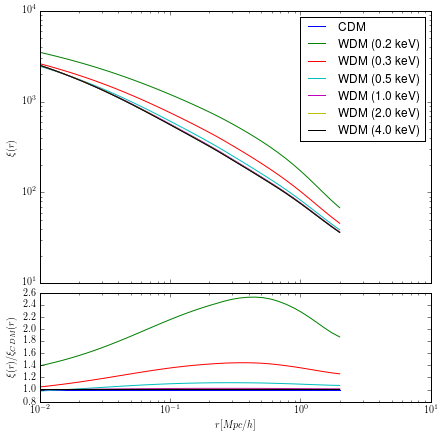

In [19]:
fig,ax = subplots(2,1,sharex=True,subplot_kw={"xscale":'log'},
                 gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

ax[0].plot(cdm.rp,cdm.projected_corr_gal,label="CDM")
ax[1].plot(cdm.rp,np.ones_like(cdm.rp))

for i,mx in enumerate([0.2,0.3,0.5,1.0,2.0,4.0]):
    wdm.update(wdm_mass=mx)
    ax[0].plot(wdm.rp,wdm.projected_corr_gal,label="WDM (%s keV)"%mx)
    ax[1].plot(wdm.rp,wdm.projected_corr_gal/cdm.projected_corr_gal)

ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)
ax[0].set_yscale('log')

Again, we see a massive biasing when the particle mass gets very small. Again, we need to ask why. We can split it up into c-s and s-s terms, to see where most of it is coming from:

(1e-15, 100000.0)

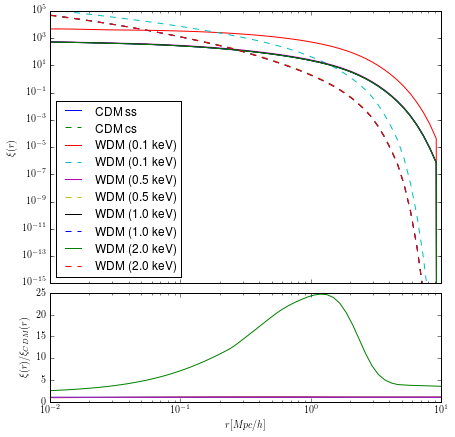

In [20]:
fig,ax = subplots(2,1,sharex=True,subplot_kw={"xscale":'log',"xlim":(0.01,10.0)},
                 gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

ax[0].plot(cdm.r,cdm.corr_gg_1h_ss,label="CDM ss")
ax[0].plot(cdm.r,cdm.corr_gg_1h_cs,label="CDM cs",ls='--')
ax[1].plot(cdm.r,np.ones_like(cdm.r))

for i,mx in enumerate([0.1,0.5,1.0,2.0]):
    wdm.update(wdm_mass=mx)
    ax[0].plot(wdm.r,wdm.corr_gg_1h_ss,label="WDM (%s keV)"%mx)
    ax[0].plot(wdm.r,wdm.corr_gg_1h_cs,label="WDM (%s keV)"%mx,ls="--")
    ax[1].plot(wdm.r,wdm.corr_gg/cdm.corr_gg)

ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)
ax[0].set_yscale('log')
ax[0].set_ylim((1e-15,1e5))

We see it comes from both terms, so we'll look at both. First, the c-s term:

$$ \xi^{c-s}(r) = \frac{2}{n_g^2} \int_{m_{vir}(r)} n(m) N_c N_s \frac{\rho(r|m)}{m} dm. $$

In our simple case, $N_c$ is equivalently 1 whenever $N_t$ is not 0, so we have $N_t = 1 + N_s$, and we can break it up into

$$ \xi^{c-s}(r) = \frac{2}{n_g^2} \left[ \int_{m_{vir}(r)} n(m) N_t \frac{\rho(r|m)}{m} dm - \int_{m_{vir}(r)} n(m) \frac{\rho(r|m)}{m} dm\right] . $$

Let's see how these two terms compare over $r$:

/Users/Steven/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in divide


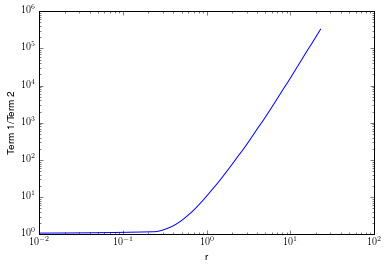

In [42]:
from scipy.integrate import simps

integrand2 = cdm.dndm*cdm.profile.rho(cdm.r,cdm.M,norm="m")
integrand1 = integrand2 * cdm.n_tot

int1 = simps(integrand1,cdm.M)
int2 = simps(integrand2,cdm.M)

plot(cdm.r,int1/int2)
xscale('log')
yscale('log')
ylabel("Term 1/Term 2")
xlabel("r")

Basically, the first term dominates at mid-to-high $r$ ($>1$Mpc$/h$), while the terms almost completely cancel at low $r$. This is the case purely because of the interplay between $\rho$ and $N_t(m)$. Explicitly, see the following plot of $\rho(m)$ for different values of $r$. 

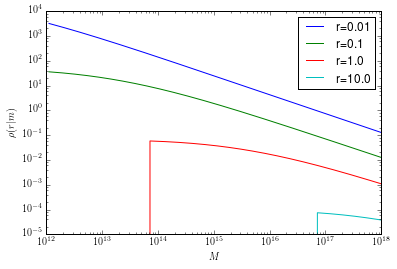

In [46]:
plot(cdm.M,cdm.profile.rho(0.01*cdm.r.unit,cdm.M,norm="m"),label="r=0.01")
plot(cdm.M,cdm.profile.rho(0.1*cdm.r.unit,cdm.M,norm="m"),label="r=0.1")
plot(cdm.M,cdm.profile.rho(1.0*cdm.r.unit,cdm.M,norm="m"),label="r=1.0")
plot(cdm.M,cdm.profile.rho(10.0*cdm.r.unit,cdm.M,norm="m"),label="r=10.0")
xscale('log')
yscale('log')
legend(loc=0)
ylabel(r"$\rho(r|m)$")
xlabel("$M$")

What we see is that on small $r$ scales, the lower masses are highly weighted. Indeed, larger values of $r$ cannot use smaller masses at all for the 1-halo term. Higher masses however have a massive dominance in the first term, since at high mass $N_t(m) \gg 1$.

So, at least at medium $r$, we can say that 

$$ \xi^{c-s}(r) \approx \frac{2}{n_g^2} \int_{m_{vir}(r)} n(m) N_t \frac{\rho(r|m)}{m} dm. $$

This is starting to look a lot like the case for the two-halo term, where instead of $b(m)$, we have $\frac{\rho(r|m)}{m}$. However, the latter decreases as a function of $m$, whereas $b(m)$ is increasing. This should on its own result in a *decrease* in the bias as $m_x$ is decreased. However, we also here have a factor of $n_g^2$, which has an extra uncancelled factor of $n_g$. 

So what happens if we normalise by this?

(1e-15, 100000.0)

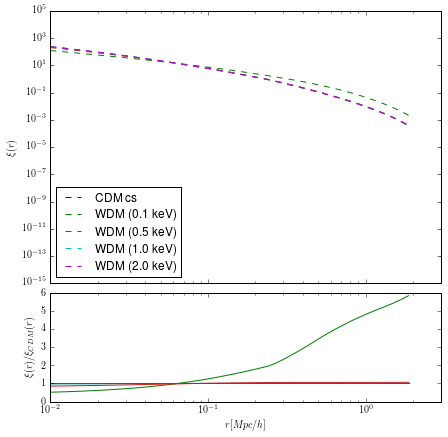

In [53]:
fig,ax = subplots(2,1,sharex=True,subplot_kw={"xscale":'log',"xlim":(0.01,3.0)},
                 gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

mask = cdm.r.value<2
#ax[0].plot(cdm.r,cdm.corr_gg_1h_ss,label="CDM ss")
ax[0].plot(cdm.r[mask],cdm.corr_gg_1h_cs[mask]*cdm.mean_gal_den,label="CDM cs",ls='--')
ax[1].plot(cdm.r[mask],np.ones_like(cdm.r[mask]))

for i,mx in enumerate([0.1,0.5,1.0,2.0]):
    wdm.update(wdm_mass=mx)
 #   ax[0].plot(wdm.r,wdm.corr_gg_1h_ss,label="WDM (%s keV)"%mx)
    ax[0].plot(wdm.r[mask],wdm.corr_gg_1h_cs[mask]*wdm.mean_gal_den,label="WDM (%s keV)"%mx,ls="--")
    ax[1].plot(wdm.r[mask],wdm.corr_gg_1h_cs[mask]*wdm.mean_gal_den/cdm.corr_gg_1h_cs[mask]/cdm.mean_gal_den)

ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)
ax[0].set_yscale('log')
ax[0].set_ylim((1e-15,1e5))

We see that the normalisation is largely fixed, but there is still a shape dependence. Remember that by $r=1$, the $c-s$ term is little more than a 1% contribution. But this increase must be due to the turnover in concentration -- smaller concentration for small $m_x$ means higher $\rho(r|m)$ for larger $r$. 

On the smallest scale (which are the scales most affected by this term, actually), we get a slight anti-bias *after the* $n_g$ *has been taken into account*. This is due to the fact that $\rho(r|m)$ decreases with mass. 


So what about the s-s term? Its definition is

$$ \xi^{s-s}(r) = \frac{1}{n_g^2} \int n(m) N_c N_s^2 \lambda(r|m)^2 dm. $$

We expect this to have a more complicated relationship with $n_g$ than the $c-s$ term, because the integral is over something 'like' a square of the integral for $n_g$. We can see the residual anyway:

(0.1, 2)

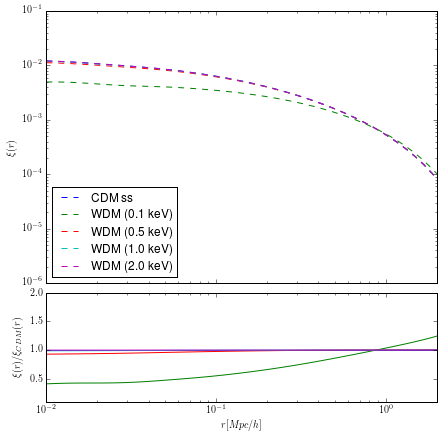

In [69]:
fig,ax = subplots(2,1,sharex=True,subplot_kw={"xscale":'log',"xlim":(0.01,2)},
                 gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

mask = np.ones(len(cdm.r),dtype=bool)
#ax[0].plot(cdm.r,cdm.corr_gg_1h_ss,label="CDM ss")
ax[0].plot(cdm.r[mask],cdm.corr_gg_1h_ss[mask]*cdm.mean_gal_den**2,label="CDM ss",ls='--')
ax[1].plot(cdm.r[mask],np.ones_like(cdm.r[mask]))

for i,mx in enumerate([0.1,0.5,1.0,2.0]):
    wdm.update(wdm_mass=mx)
 #   ax[0].plot(wdm.r,wdm.corr_gg_1h_ss,label="WDM (%s keV)"%mx)
    ax[0].plot(wdm.r[mask],wdm.corr_gg_1h_ss[mask]*wdm.mean_gal_den**2,label="WDM (%s keV)"%mx,ls="--")
    ax[1].plot(wdm.r[mask],wdm.corr_gg_1h_ss[mask]*wdm.mean_gal_den**2/cdm.corr_gg_1h_ss[mask]/cdm.mean_gal_den**2)

ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)
ax[0].set_yscale('log')
ax[0].set_ylim((1e-6,1e-1))
ax[1].set_ylim((0.1,2))

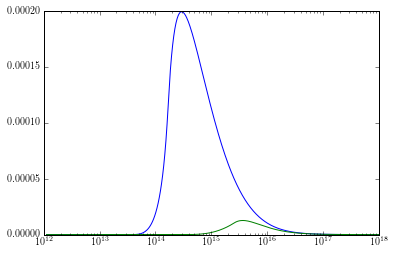

In [73]:
# At r=2
wdm.update(wdm_mass=0.1)
plot(cdm.M,cdm.profile.lam(cdm.r[47],cdm.M,norm="m")**2)
plot(cdm.M,wdm.profile.lam(wdm.r[47],wdm.M,norm="m")**2)
xscale('log')

In [72]:
cdm.r[47]

<Quantity 2.099382202959593 Mpc / h>

Okay, so in my understanding, what's happening is again that with the concentration change, that more correlations are seen at $r\sim _{vir}$ as compared to when there was high concentration. 

Given that the concentration is the key part here, we'd need to model that fairly well. But with our current knowledge, without normalisation, let's try to get how deep we'd have to go for a 10% difference at 2keV:

In [75]:
wdm.update(wdm_mass=2.0)

for mmin in np.arange(8.0,5.0,-0.1):
    cdm.update(hod_params={"M_min":mmin})
    wdm.update(hod_params={"M_min":mmin})
    
    w = wdm.projected_corr_gal/np.mean(wdm.projected_corr_gal)
    c = cdm.projected_corr_gal/np.mean(cdm.projected_corr_gal)
    maxx = np.max(np.abs(w/c-1))
    print mmin, maxx,
    if maxx>=0.1:
        print "wins the day."
        break
    print 

8.0 0.0337330383455
7.9 0.036269265238
7.8 0.0395131076569
7.7 0.042004859593
7.6 0.0446202873319
7.5 0.046978247647
7.4 0.0489560971115
7.3 0.0510908735782
7.2 0.0527219167895
7.1 0.0545475169037
7.0 0.0560086977239
6.9 0.0575388738903
6.8 0.0588499992035
6.7 0.0601955285982
6.6 0.0613993931499
6.5 0.062611509738
6.4 0.0637189117885
6.3 0.064828905297
6.2 0.0658283752353
6.1 0.0668431231393
6.0 0.0677351575005
5.9 0.0684140082672
5.8 0.0689360304384
5.7 0.0693355146206
5.6 0.0696414774415
5.5 0.0698722968337
5.4 0.070048258467
5.3 0.0701838797206
5.2 0.0702863212125
5.1 0.0703656921401


In summary, the effects of the changing of concentration on the profile lead to very small changes in the correlation at small scales, modulo broad-scale biasing.

However, we can still check how scaling $M_{min}$ changes things, because though it might induce a similar overall bias, the scale-dependence may be different.

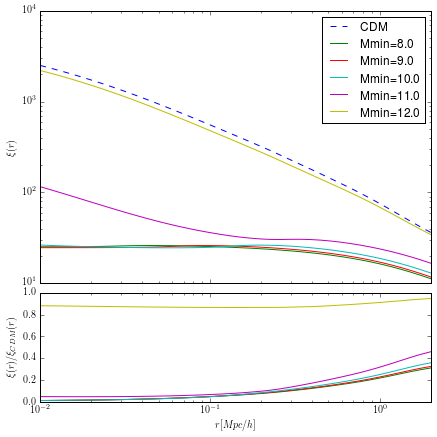

In [80]:
fig,ax = subplots(2,1,sharex=True,subplot_kw={"xscale":'log',"xlim":(0.01,2)},
                 gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

cdm.update(hod_params={"M_min":12.0478})
wdm.update(wdm_mass=10000.0)
#ax[0].plot(cdm.r,cdm.corr_gg_1h_ss,label="CDM ss")
ax[0].plot(cdm.rp,cdm.projected_corr_gal,label="CDM",ls='--')
ax[1].plot(cdm.rp,np.ones_like(cdm.rp))

for i,mmin in enumerate([8.0,9.0,10.0,11.0,12.0]):
    wdm.update(hod_params={"M_min":mmin})
    ax[0].plot(wdm.rp,wdm.projected_corr_gal,label="Mmin=%s"%mmin)
    ax[1].plot(wdm.rp,wdm.projected_corr_gal/cdm.projected_corr_gal)

ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)
ax[0].set_yscale('log')
#ax[0].set_ylim((1e-6,1e-1))
#ax[1].set_ylim((0.1,2))

Though there is a similar broad-band bias shift with $M_{min}$, as expected, the shape is different, and the interplay may amplify the signal of WDM. We'll check that later.

## Transition Scales

### Setup

In [81]:
wdm = ProjectedCFWDM(**kwargs)
cdm = deepcopy(wdm)
cdm.update(wdm_mass=10000.0)

wdm.rlog=True
cdm.rlog=True
wdm.update(rp_min=1.0,rp_max=40.,rp_num=40,rnum=80,proj_limit=80.0)
cdm.update(rp_min=1.0,rp_max=40.,rp_num=40,rnum=80,proj_limit=80.0)

Again, let's start with just changing $m_x$ and having a look:

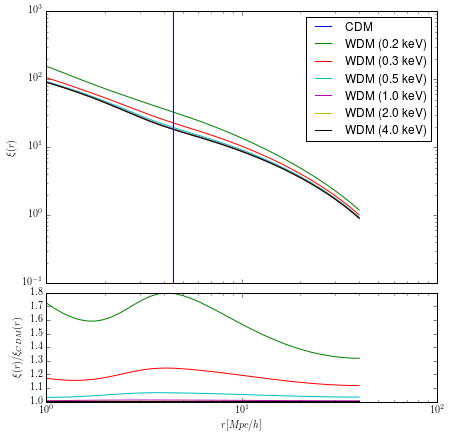

In [84]:
fig,ax = subplots(2,1,sharex=True,subplot_kw={"xscale":'log'},
                 gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

ax[0].plot(cdm.rp,cdm.projected_corr_gal,label="CDM")
ax[1].plot(cdm.rp,np.ones_like(cdm.rp))

for i,mx in enumerate([0.2,0.3,0.5,1.0,2.0,4.0]):
    wdm.update(wdm_mass=mx)
    ax[0].plot(wdm.rp,wdm.projected_corr_gal,label="WDM (%s keV)"%mx)
    ax[1].plot(wdm.rp,wdm.projected_corr_gal/cdm.projected_corr_gal)

ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)
ax[0].set_yscale('log')

#scale of crossover
ratio = cdm.corr_gg_2h/cdm.corr_gg_1h
ind = np.where(ratio>10)[0][0]
ax[0].axvline(cdm.r.value[ind])

It would seem that the overall bias is again mostly affected by $b_{eff}$, but let's just do the empirical thing and divide by the mean:

IndexError: index -1 is out of bounds for axis 0 with size 0

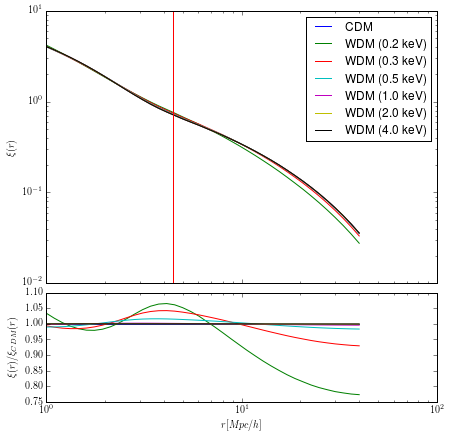

In [109]:
fig,ax = subplots(2,1,sharex=True,subplot_kw={"xscale":'log'},
                 gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

ax[0].plot(cdm.rp,cdm.projected_corr_gal/np.mean(cdm.projected_corr_gal),label="CDM")
ax[1].plot(cdm.rp,np.ones_like(cdm.rp))

for i,mx in enumerate([0.2,0.3,0.5,1.0,2.0,4.0]):
    wdm.update(wdm_mass=mx)
    ax[0].plot(wdm.rp,wdm.projected_corr_gal/np.mean(wdm.projected_corr_gal),label="WDM (%s keV)"%mx)
    ax[1].plot(wdm.rp,wdm.projected_corr_gal*np.mean(cdm.projected_corr_gal)/cdm.projected_corr_gal/np.mean(wdm.projected_corr_gal))

ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)
ax[0].set_yscale('log')

#scale of crossover
wdm.update(wdm_mass=0.2)
ratio = cdm.corr_gg_2h/cdm.corr_gg_1h
ind = np.where(ratio>10)[0][0]
ax[0].axvline(cdm.r.value[ind])
ratio = wdm.corr_gg_2h/wdm.corr_gg_1h
ind = np.where(ratio>10)[0][0]
ax[0].axvline(cdm.r.value[ind],color="r")
ind = np.where(ratio<0.1)[0][-1]
ax[0].axvline(cdm.r.value[ind],color="r")

thalo_c = cdm.corr_gg_2h
thalo_w = wdm.corr_gg_2h
cdm.update(halo_exclusion="NoExclusion")
wdm.update(halo_exclusion="NoExclusion")
ratio_c = thalo_c/cdm.corr_gg_2h
ratio_w = thalo_w/wdm.corr_gg_2h
ind_c = np.where(ratio_c<0.9)[0][-1]
ind_w = np.where(ratio_w<0.9)[0][-1]
ax[0].axvline(cdm.r.value[ind_c],ls="--")
ax[0].axvline(cdm.r.value[ind_w],ls="--",color="r")

cdm.update(halo_exclusion="NgMatched_")
wdm.update(halo_exclusion="NgMatched_")

Inside the red vertical lines above, there is a greater than 10% contribution to the total $\xi(r)$ from both 1h and 2h terms. 

Given that the second lump is around 10% deviation, we expect it to come mostly from either the two-halo term or the interplay between them. If from the two halo term, we expect it is likely from the exclusion region (before the dashed vertical lines), so let's check:

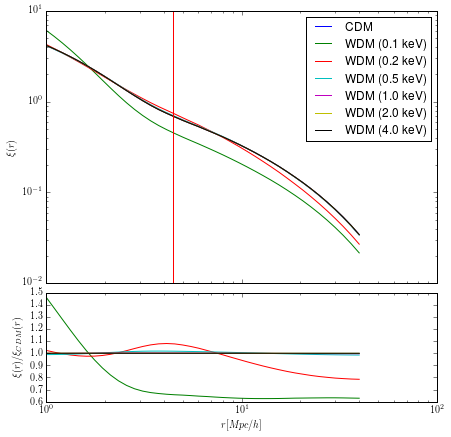

In [121]:
fig,ax = subplots(2,1,sharex=True,subplot_kw={"xscale":'log'},
                 gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))


cdm.update(halo_exclusion="NoExclusion")
wdm.update(halo_exclusion="NoExclusion")

ax[0].plot(cdm.rp,cdm.projected_corr_gal/np.mean(cdm.projected_corr_gal),label="CDM")
ax[1].plot(cdm.rp,np.ones_like(cdm.rp))

for i,mx in enumerate([0.1,0.2,0.5,1.0,2.0,4.0]):
    wdm.update(wdm_mass=mx)
    ax[0].plot(wdm.rp,wdm.projected_corr_gal/np.mean(wdm.projected_corr_gal),label="WDM (%s keV)"%mx)
    ax[1].plot(wdm.rp,wdm.projected_corr_gal*np.mean(cdm.projected_corr_gal)/cdm.projected_corr_gal/np.mean(wdm.projected_corr_gal))

ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)
ax[0].set_yscale('log')

#scale of crossover
wdm.update(wdm_mass=0.2)
ratio = cdm.corr_gg_2h/cdm.corr_gg_1h
ind = np.where(ratio>10)[0][0]
ax[0].axvline(cdm.r.value[ind])
ratio = wdm.corr_gg_2h/wdm.corr_gg_1h
ind = np.where(ratio>10)[0][0]
ax[0].axvline(cdm.r.value[ind],color="r")

We still see basically the same features, though marginally reduced, plus when we go to even lowe WDM mass, a different feature arises, but since it is so qualitatively different, and that WDM mass is never going to happen, we probably don't need to worry about it. So where is the feature coming from?

Clearly, the WDM becomes flatter over the transition as compared to the CDM. We can see this in the following plot:

(0.01, 100)

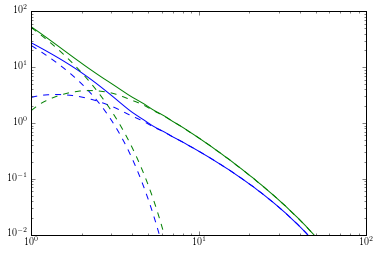

In [115]:
cdm.update(halo_exclusion="NgMatched_")
wdm.update(halo_exclusion="NgMatched_",wdm_mass=0.2)

plot(cdm.r, cdm.corr_gg,label="CDM",color='b')
plot(cdm.r, cdm.corr_gg_1h,ls='--',color='b')
plot(cdm.r, cdm.corr_gg_2h,ls='--',color='b')

plot(cdm.r, wdm.corr_gg,label="WDM",color='g')
plot(cdm.r, wdm.corr_gg_1h,ls='--',color='g')
plot(cdm.r, wdm.corr_gg_2h,ls='--',color='g')

xscale('log')
yscale('log')
ylim((1e-2,100))

Try it by just changing $M_{min}$:

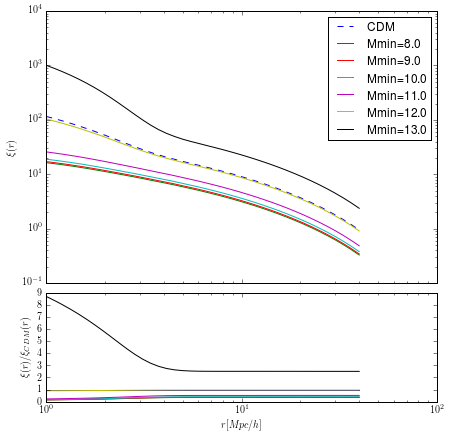

In [119]:
fig,ax = subplots(2,1,sharex=True,subplot_kw={"xscale":'log'},
                 gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

cdm.update(hod_params={"M_min":12.0478})
wdm.update(wdm_mass=10000.0)
#ax[0].plot(cdm.r,cdm.corr_gg_1h_ss,label="CDM ss")
ax[0].plot(cdm.rp,cdm.projected_corr_gal,label="CDM",ls='--')
ax[1].plot(cdm.rp,np.ones_like(cdm.rp))

for i,mmin in enumerate([8.0,9.0,10.0,11.0,12.0,13.0]):
    wdm.update(hod_params={"M_min":mmin})
    ax[0].plot(wdm.rp,wdm.projected_corr_gal,label="Mmin=%s"%mmin)
    ax[1].plot(wdm.rp,wdm.projected_corr_gal/cdm.projected_corr_gal)

ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)
ax[0].set_yscale('log')
wdm.update(hod_params={"M_min":12.0478})

What we see is that decreasing $M_{min}$ decreases the 1halo term, since we are introducing a whole heap more haloes that have only a single central galaxy in them, thus lowering the mean correlation inside haloes. This smooths the transition (actually, it should also move the transition point). Conversely, if we move $M_{min}$ up, we increase the 1halo term, since all the halos have heaps of satellites, whereas the two-halo term is only increased moderately. So the transition is sharper. 

In the case of changing the WDM mass, things seem to happen slightly differently. Though the bias is raised on each term with decreasing $m_x$, there is a scale dependence which works against the sharpness. All in all, it becomes quite complex, and really, in this regime, we cannot ignore the contributions from $M_1$ and $\alpha$. 

For simplicity, let's assume first up that $\alpha$ is fairly fixed (it can change for say colour selections or whatever, but if we just "look deeper", it should stay roughly fixed), but that $M_1$ is always about 1.3 larger than $M_{min}$ (this is roughly true in the regions of Beutler+13). Then,

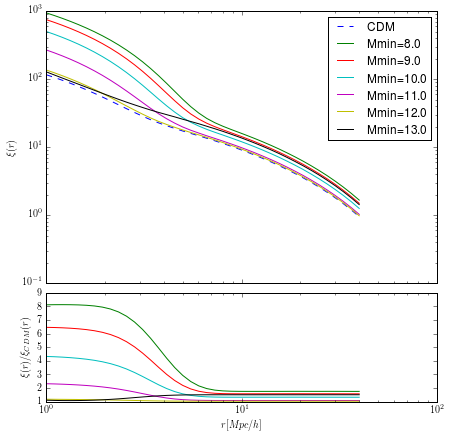

In [123]:
fig,ax = subplots(2,1,sharex=True,subplot_kw={"xscale":'log'},
                 gridspec_kw={"height_ratios":[2.5,1],"hspace":0.05},figsize=(7,7))

cdm.update(hod_params={"M_min":12.0478})
wdm.update(wdm_mass=10000.0)
#ax[0].plot(cdm.r,cdm.corr_gg_1h_ss,label="CDM ss")
ax[0].plot(cdm.rp,cdm.projected_corr_gal,label="CDM",ls='--')
ax[1].plot(cdm.rp,np.ones_like(cdm.rp))

for i,mmin in enumerate([8.0,9.0,10.0,11.0,12.0,13.0]):
    wdm.update(hod_params={"M_min":mmin,"M_1":mmin+1.3})
    ax[0].plot(wdm.rp,wdm.projected_corr_gal,label="Mmin=%s"%mmin)
    ax[1].plot(wdm.rp,wdm.projected_corr_gal/cdm.projected_corr_gal)

ax[1].set_xlabel(r"$r [Mpc/h]$")
ax[0].set_ylabel(r"$\xi(r)$")
ax[1].set_ylabel(r"$\xi(r)/\xi_{CDM}(r)$")
ax[0].legend(loc=0)
ax[0].set_yscale('log')
wdm.update(hod_params={"M_min":12.0478,"M_1":13.396})

Here there is a bit of a clearer picture: raising $M_{min}$ lowers the bias in both terms, because now the excess bias in the two-halo term is reversed by the decrease in the total galaxy number. But the 1halo term has a much greater decrease, because moving $M_1$ up means having less satellites (on top of the decrease from $M_{min}$).